# HOW TO RETRIEVE AND USE DART TRIGGER DATA

The data are available through the [GeoNet GitHub data repository](https://github.com/GeoNet/data/tree/main/dart-triggers), and more information on the dataset can be found there.

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Data retrieval and basic graphing

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [8]:
#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

#for datetime functionality
import datetime as dt

#for tilde data
import requests
from io import StringIO

import warnings
warnings.simplefilter(action='ignore')

## &nbsp;2. Basic data retrieval and graphing

We will retrieve the trigger file, select one trigger, get the corresponding data from [Tilde](https://tilde.geonet.org.nz/), and combine the two in a simple graph.

In [9]:
url = 'https://raw.githubusercontent.com/GeoNet/data/refs/heads/main/dart-triggers/DART_trigger_catalogue.csv'
trg = pd.read_csv(url, parse_dates=['Time triggered (UTC)'])

In [10]:
trg.tail()

,Category,Station,Time triggered (UTC)
187,U,NZA,2022-11-01 02:19:30+00:00
188,U,NZA,2022-11-28 03:11:00+00:00
189,U,NZA,2022-11-30 20:24:45+00:00
190,U,NZA,2023-02-25 04:15:00+00:00
191,U,NZA,2023-02-25 20:32:45+00:00


Get the trigger(s) for station `NZA` on `2023-04-15`

In [11]:
trigger = trg[(trg['Station']=='NZA')&(trg['Time triggered (UTC)'].between('2023-04-15', '2023-04-16'))]
trigger

,Category,Station,Time triggered (UTC)
6,SP,NZA,2023-04-15 15:39:45+00:00


Get corresponding detided DART data from Tilde. Refer to [Tilde data tutorials](https://github.com/GeoNet/data-tutorials/tree/main/Tilde) for more detailed information on acquiring and using data from the Tilde API, including DART data.

In [12]:
url = 'https://tilde.geonet.org.nz/v4/data/dart/NZA/water-height-detided/41/15s/-/2023-04-15/2023-04-15'

r = requests.get(url, headers={'Accept':'text/csv'})

df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2023-04-15 15:09:45+00:00,dart,NZA,water-height-detided,41,15s,nil,0.0957,m,0.0,m,NaN
2023-04-15 15:10:00+00:00,dart,NZA,water-height-detided,41,15s,nil,0.0937,m,0.0,m,NaN
2023-04-15 15:10:15+00:00,dart,NZA,water-height-detided,41,15s,nil,0.0938,m,0.0,m,NaN
2023-04-15 15:10:30+00:00,dart,NZA,water-height-detided,41,15s,nil,0.0948,m,0.0,m,NaN
2023-04-15 15:10:45+00:00,dart,NZA,water-height-detided,41,15s,nil,0.0959,m,0.0,m,NaN


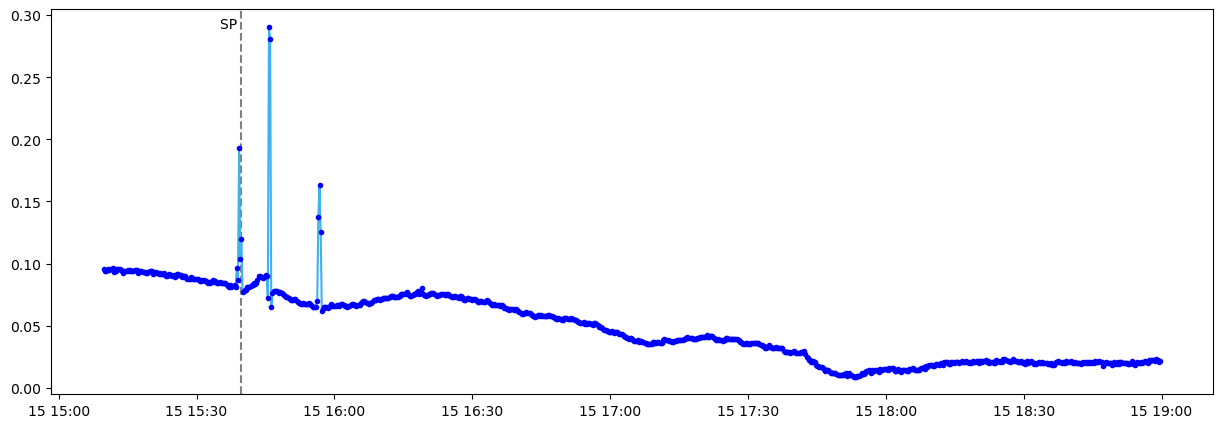

In [13]:
fig,ax = plt.subplots(figsize=(15,5))

#show trigger as dashed line, and label with the trigger category
ax.axvline(trigger['Time triggered (UTC)'], linestyle='--', color='grey')
#x coord is data, y coord is axis
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.text(trigger['Time triggered (UTC)'], 0.95, 'SP ', ha='right', transform=trans)

ax.plot(df['value'], color='#41b0f0')
ax.plot(df['value'], color='blue', marker='.', linestyle='None')